In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM,AutoModel
from helical.models.genept.genept_config import GenePTConfig
import torch
import json
from tqdm import tqdm
from datasets import Dataset
import torch
import numpy as np


/home/maxime/miniconda3/envs/helical_clean/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:datasets:PyTorch version 2.5.1 available.
INFO:datasets:TensorFlow version 2.17.0 available.
2025-01-02 09:42:47.294506: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-02 09:42:47.368738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 09:42:47.401375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN fact

In [2]:
%load_ext autoreload
%autoreload 2
from helical.models.genept.model import GenePT, GenePTConfig
from datasets import load_dataset
from helical.utils import get_anndata_from_hf_dataset

genept_config = GenePTConfig(device="cuda")
genept = GenePT(configurer = genept_config)

# either load via huggingface
hf_dataset = load_dataset("helical-ai/yolksac_human",split="train[:5%]", trust_remote_code=True, download_mode="reuse_cache_if_exists")
ann_data = get_anndata_from_hf_dataset(hf_dataset)

INFO:helical.models.genept.model:GenePT initialized successfully.
Generating test split: 100%|██████████| 6336/6336 [00:02<00:00, 2171.37 examples/s]


In [112]:
data = genept.process_data(ann_data)

In [113]:
data.X = data.X.toarray().copy()

In [114]:
import numpy as np

In [117]:
embs = genept.get_embeddings(data)

INFO:helical.models.genept.model:Inference started:
INFO:helical.models.genept.model:Couln't find 61 genes in embeddings


In [116]:
embs.shape

torch.Size([1267, 256])

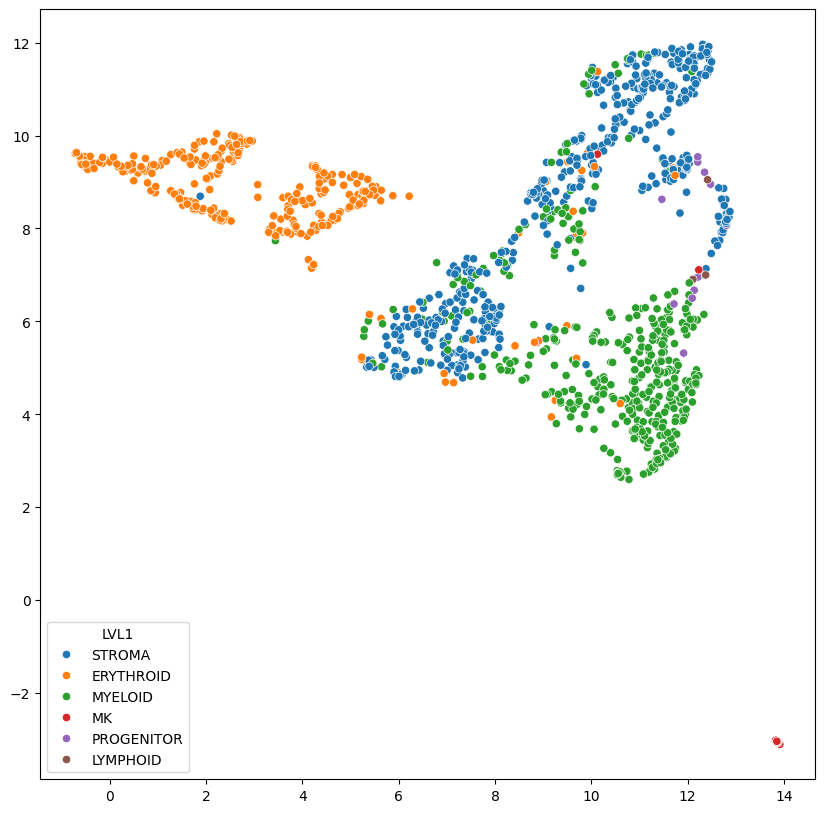

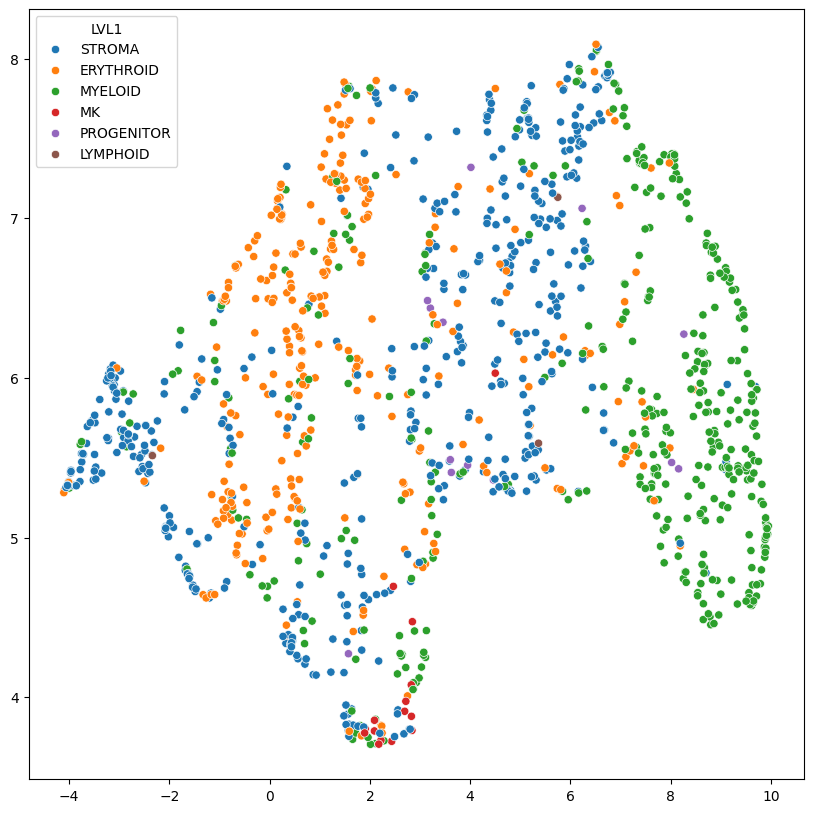

In [120]:
### UMAP Clustering of Embeddings

import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

umap_emb = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='cosine').fit_transform(embs)

plt.figure(figsize=(10,10))
sns.scatterplot(x=umap_emb[:,0],y=umap_emb[:,1],hue=data.obs['LVL1'])
plt.show()
